In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('../../data/final_diaries.csv')

df['start_datetime'] = pd.to_datetime(df['start_datetime'])


In [25]:
df['time_since_last_activity'] = df.groupby('ID')['start_datetime'].diff()
df['time_since_last_activity'] = df['time_since_last_activity'].dt.total_seconds()/60**2
df['time_since_last_activity'].fillna(df['time_since_last_activity'].mean(), inplace=True)

/tmp/ipykernel_2115897/3967831394.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['time_since_last_activity'].fillna(df['time_since_last_activity'].mean(), inplace=True)


In [26]:
df_cut = df[(df['duration']<=30)&(df['duration']>=10)] 
#df_cut = df_cut[df_cut['insulin_bins_comb']!='>5']
df_cut = df_cut[df_cut['start_glc']>10]

In [27]:
df_cut.drop_duplicates(['ID', 'start_datetime'])

,ID,start_datetime,finish_datetime,duration,start_glc,start_roc,glc_20m_post,time_since_last_ins_dose,dose,intensity,...,roc_bins,start_glc_bins,insulin_bins,morning,pre_exercise,post_exercise,day_of_week,bout_id,insulin_bins_comb,time_since_last_activity
24,dexip_100,2021-08-18 11:56:00,2021-08-18 12:11:00,15.0,10.50,0.1470,8.83,0.850000,10.50,0.0,...,rapid_rising,10-12,1.0,1,2021-08-18 10:56:00,2021-08-18 15:56:00,2,24,0-2,15.700000
31,dexip_101,2021-12-26 12:37:21,2021-12-26 12:52:21,15.0,11.33,0.0165,8.94,1.423889,16.65,1.0,...,stable,10-12,1.0,0,2021-12-26 11:37:21,2021-12-26 16:37:21,6,31,0-2,23.872500
34,dexip_101,2021-12-28 12:30:00,2021-12-28 12:50:00,20.0,19.72,-0.0250,17.56,2.333333,1.50,0.0,...,stable,18-20,2.0,0,2021-12-28 11:30:00,2021-12-28 16:30:00,1,34,2-5,1.500000
42,dexip_102,2021-09-02 13:27:00,2021-09-02 13:47:00,20.0,10.78,0.0085,12.83,1.747500,19.00,0.0,...,stable,10-12,2.0,0,2021-09-02 12:27:00,2021-09-02 17:27:00,3,42,0-2,18.950000
47,dexip_102,2021-09-08 10:45:00,2021-09-08 11:10:00,25.0,20.28,-0.0640,15.33,0.516389,17.00,0.0,...,rapid_falling,20-22,1.0,1,2021-09-08 09:45:00,2021-09-08 14:45:00,2,47,0-2,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18284,helm_987,2020-11-15 06:47:38,2020-11-15 07:07:38,20.0,11.94,-0.0445,9.11,0.932500,4.00,1.0,...,falling,10-12,1.0,1,2020-11-15 05:47:38,2020-11-15 10:47:38,6,18284,0-2,10.371389
18287,helm_987,2020-11-17 18:00:00,2020-11-17 18:30:00,30.0,10.56,-0.0080,7.78,2.071389,3.00,0.0,...,stable,10-12,2.0,0,2020-11-17 17:00:00,2020-11-17 22:00:00,1,18287,2-5,35.065278
18290,helm_987,2020-11-18 22:00:07,2020-11-18 22:20:07,20.0,10.72,0.0220,10.61,2.955556,2.00,1.0,...,stable,10-12,3.0,0,2020-11-18 21:00:07,2020-11-19 02:00:07,2,18290,2-5,3.958889
18297,helm_987,2020-11-22 22:51:22,2020-11-22 23:03:22,12.0,12.67,-0.0805,12.22,1.776944,3.00,1.0,...,rapid_falling,12-14,2.0,0,2020-11-22 21:51:22,2020-11-23 02:51:22,6,18297,0-2,2.870000


In [28]:
df_cut.shape

(2216, 21)

In [29]:
df_cut['glc_change'] = df_cut['glc_20m_post']- df_cut['start_glc']
df_cut['glc_perc_change'] = df_cut['glc_change']/ df_cut['start_glc'] * 100

In [30]:
df_cut['iob_ish'] = df_cut['dose']/df_cut['time_since_last_ins_dose']

In [31]:
df_iob = pd.read_csv('../../../hypo-predict/data/tidy_data/demographics_df.csv')

df_iob['start_datetime'] = pd.to_datetime(df_iob['start_datetime'])

In [32]:
df_iob['IOB/kg'].describe()

count    15523.000000
mean         0.030862
std          0.042341
min          0.000000
25%          0.000845
50%          0.018098
75%          0.042283
max          0.641346
Name: IOB/kg, dtype: float64

In [33]:
df_iob.IOB.describe()

count    15523.000000
mean         2.050645
std          2.738175
min          0.000000
25%          0.059143
50%          1.230417
75%          2.852754
max         46.545556
Name: IOB, dtype: float64

In [34]:
df_old = pd.read_csv('../../data/final_df_jaeb.csv')
other_info = df_old[['ID', 'start_datetime', 'form_of_exercise','hba1c',
 'bmi','age', 'insulin_modality','time_of_day','food_pre_30', 
 'food_pre_60',
 'sex',
 'Average glucose (mmol/L)',
 'eA1c (%)',
 'SD (mmol/L)',
 'CV (%)',
 'AUC (mmol h/L)',
 'LBGI',
 'HBGI',
 'MAGE (mmol/L)',
 'TIR normal (%)',
 'TIR normal 1 (%)',
 'TIR normal 2 (%)',
 'TIR level 1 hypoglycemia (%)',
 'TIR level 2 hypoglycemia (%)',
 'TIR level 1 hyperglycemia (%)',
 'TIR level 2 hyperglycemia (%)',
 'Total number hypoglycemic events',
 'Number LV1 hypoglycemic events',
 'Number LV2 hypoglycemic events',
 'Number prolonged hypoglycemic events',
 'Total number hyperglycemic events',
 'Number LV1 hyperglycemic events',
 'Number LV2 hyperglycemic events',
 'Number prolonged hyperglycemic events',
 ]]

other_info['start_datetime'] = pd.to_datetime(other_info['start_datetime']) 


/tmp/ipykernel_2115897/4173579611.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_info['start_datetime'] = pd.to_datetime(other_info['start_datetime'])


In [35]:
df_cut_other = pd.merge(df_cut, other_info, on=['ID', 'start_datetime'], how='inner')


df_cut_other = pd.merge(df_cut_other, df_iob[['ID', 'start_datetime', 'IOB/kg', 'IOB']], on=['ID', 'start_datetime'], how='inner')

In [36]:
df_cut_other['hour_of_day'] = df_cut_other.start_datetime.dt.hour

In [37]:
df_cut_other.to_csv('../../data/cut_data_non_paired.csv', index=False)

In [38]:
df_cut_other.dropna(inplace=True)

In [39]:
df_cut_other

,ID,start_datetime,finish_datetime,duration,start_glc,start_roc,glc_20m_post,time_since_last_ins_dose,dose,intensity,...,Number LV1 hypoglycemic events,Number LV2 hypoglycemic events,Number prolonged hypoglycemic events,Total number hyperglycemic events,Number LV1 hyperglycemic events,Number LV2 hyperglycemic events,Number prolonged hyperglycemic events,IOB/kg,IOB,hour_of_day
0,dexip_100,2021-08-18 11:56:00,2021-08-18 12:11:00,15.0,10.50,0.1470,8.83,0.850000,10.50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117610,8.268750,11
1,dexip_101,2021-12-26 12:37:21,2021-12-26 12:52:21,15.0,11.33,0.0165,8.94,1.423889,16.65,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.266985,21.192906,12
2,dexip_101,2021-12-28 12:30:00,2021-12-28 12:50:00,20.0,19.72,-0.0250,17.56,2.333333,1.50,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.007874,0.625000,12
3,dexip_102,2021-09-02 13:27:00,2021-09-02 13:47:00,20.0,10.78,0.0085,12.83,1.747500,19.00,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.162676,10.699375,13
4,dexip_102,2021-09-08 10:45:00,2021-09-08 11:10:00,25.0,20.28,-0.0640,15.33,0.516389,17.00,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.225105,14.805347,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,helm_987,2020-11-08 06:45:32,2020-11-08 07:15:32,30.0,10.50,0.0780,9.56,0.074722,1.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043620,2.888681,6
2054,helm_987,2020-11-15 06:47:38,2020-11-15 07:07:38,20.0,11.94,-0.0445,9.11,0.932500,4.00,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.046320,3.067500,6
2055,helm_987,2020-11-17 18:00:00,2020-11-17 18:30:00,30.0,10.56,-0.0080,7.78,2.071389,3.00,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.027769,1.838958,18
2056,helm_987,2020-11-18 22:00:07,2020-11-18 22:20:07,20.0,10.72,0.0220,10.61,2.955556,2.00,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.007886,0.522222,22


## Random bs

In [40]:
df_cut_other['day_of_week'] = df_cut_other['start_datetime'].dt.day_name()

In [41]:
df_cut_other['mdi'] = df_cut_other['insulin_modality'].apply(lambda x: 1 if x=='mdi' else 0)

In [42]:
df_cut_other['pump'] = df_cut_other['insulin_modality'].apply(lambda x: 1 if x=='pump' else 0)

In [43]:
df_cut_other['aerobic'] = df_cut_other['form_of_exercise'].apply(lambda x: 1 if x=='aer' else 0)

In [44]:
df_cut_other['insulin_modality'].value_counts()

insulin_modality
closed_loop    932
pump           667
mdi            360
Name: count, dtype: int64

In [45]:
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Define the dependent and independent variables
response = df_cut_other['glc_change']
predictors = df_cut_other[[#'form_of_exercise', #'time_of_day',  'day_of_week',
       #'aerobic',
       #'insulin_modality', #'sex', #'food_pre_30',
      #'mdi', 
      'pump',
      'food_pre_60',
       'start_glc', 'start_roc', 'time_since_last_ins_dose', 'duration',
       #'intensity',
       'hba1c', 'bmi', 'age',
       #'time_since_last_activity',
       #'Average glucose (mmol/L)',
      #'eA1c (%)',
      #'SD (mmol/L)',
      'CV (%)',
      #'AUC (mmol h/L)',
      #'LBGI',
      #'HBGI',
      #'MAGE (mmol/L)',
      #'TIR normal (%)',
      #'TIR normal 1 (%)',
      #'TIR normal 2 (%)',
      #'TIR level 1 hypoglycemia (%)',
      #'TIR level 2 hypoglycemia (%)',
      #'TIR level 1 hyperglycemia (%)',
      #'TIR level 2 hyperglycemia (%)',
      #'Total number hypoglycemic events',
      #'Number LV1 hypoglycemic events',
      #'Number LV2 hypoglycemic events',
      #'Number prolonged hypoglycemic events',
      #'Total number hyperglycemic events',
      #'Number LV1 hyperglycemic events',
      #'Number LV2 hyperglycemic events',
      #'Number prolonged hyperglycemic events',
       ]] # , 'hour_of_day', 'day_of_week'

predictors = pd.get_dummies(predictors, drop_first=True)
predictors = predictors.astype('float64')

predictors.fillna(0, inplace=True)
# Add a constant term to the predictors (optional)


In [41]:
predictors = sm.add_constant(predictors)
# Define the mixed model
# 'group' is the random effects grouping variable
model = MixedLM(response, predictors, groups=df_cut_other['ID'])

# Fit the model
result = model.fit()

# Print the summary of the fitted model
print(result.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     glc_change
No. Observations:     1959        Method:                 REML      
No. Groups:           561         Scale:                  5.7914    
Min. group size:      1           Log-Likelihood:         -4634.7637
Max. group size:      20          Converged:              Yes       
Mean group size:      3.5                                           
--------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
const                     0.603    0.697   0.865 0.387 -0.763  1.969
pump                     -0.269    0.153  -1.760 0.078 -0.568  0.031
food_pre_60              -0.802    0.222  -3.617 0.000 -1.236 -0.367
start_glc                -0.303    0.027 -11.041 0.000 -0.357 -0.250
start_roc                14.827    0.968  15.310 0

In [42]:
predictors = sm.add_constant(predictors)
# Define the mixed model
# 'group' is the random effects grouping variable
model = MixedLM(response, predictors, groups=df_cut_other['ID'])

# Fit the model
result = model.fit()

# Print the summary of the fitted model
print(result.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     glc_change
No. Observations:     1959        Method:                 REML      
No. Groups:           561         Scale:                  5.7914    
Min. group size:      1           Log-Likelihood:         -4634.7637
Max. group size:      20          Converged:              Yes       
Mean group size:      3.5                                           
--------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
const                     0.603    0.697   0.865 0.387 -0.763  1.969
pump                     -0.269    0.153  -1.760 0.078 -0.568  0.031
food_pre_60              -0.802    0.222  -3.617 0.000 -1.236 -0.367
start_glc                -0.303    0.027 -11.041 0.000 -0.357 -0.250
start_roc                14.827    0.968  15.310 0

In [43]:
import pandas as pd

# Assuming `result` is your fitted model object
# Extract the summary table as a DataFrame
summary_df = pd.DataFrame({
    "Coef.": result.params,
    "Std.Err.": result.bse,
    "z": result.tvalues,  # z-values (t-values in statsmodels' terminology)
    "P>|z|": result.pvalues,
    "[0.025": result.conf_int()[0],
    "0.975]": result.conf_int()[1]
})

# Sort by absolute z-score
summary_df_sorted = summary_df.reindex(summary_df["z"].abs().sort_values(ascending=False).index)
summary_df_sorted

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
start_roc,14.827291,0.968476,15.309925,6.563982e-53,12.929113,16.725468
start_glc,-0.303407,0.027481,-11.040784,2.429048e-28,-0.357268,-0.249546
CV (%),-0.069188,0.009335,-7.411442,1.249335e-13,-0.087485,-0.050891
duration,-0.058207,0.009290,-6.265810,3.708931e-10,-0.076414,-0.040000
Group Var,0.154517,0.032218,4.796056,1.618205e-06,0.091372,0.217663
hba1c,0.033777,0.007634,4.424346,9.673495e-06,0.018814,0.048740
food_pre_60,-0.801584,0.221604,-3.617196,2.978118e-04,-1.235919,-0.367249
age,-0.017783,0.005155,-3.449462,5.617040e-04,-0.027887,-0.007679
bmi,0.060797,0.017838,3.408317,6.536482e-04,0.025835,0.095758
pump,-0.268543,0.152619,-1.759561,7.848224e-02,-0.567672,0.030585


In [44]:
from sklearn.preprocessing import StandardScaler

# List of variables to scale
variables_to_scale = [
    'start_glc', 'start_roc', 'time_since_last_ins_dose', 'duration', 'intensity',
    'hba1c', 'bmi', 'age', 'time_since_last_activity',#'food_pre_30',
 'food_pre_60',
    #'Average glucose (mmol/L)', 
    #'eA1c (%)', 
    #'SD (mmol/L)', 
    'CV (%)', 
    #'AUC (mmol h/L)', 'LBGI', 'HBGI', #'MAGE (mmol/L)', 
    #'TIR normal (%)', 
    #'TIR normal 1 (%)', 'TIR normal 2 (%)', 
    #'TIR level 1 hypoglycemia (%)', 
    #'TIR level 2 hypoglycemia (%)', 
    #'TIR level 1 hyperglycemia (%)', 
    #'TIR level 2 hyperglycemia (%)', 
    #'Total number hypoglycemic events', 
    #'Number LV1 hypoglycemic events', 'Number LV2 hypoglycemic events', 
    #'Number prolonged hypoglycemic events', 'Total number hyperglycemic events', 
    #'Number LV1 hyperglycemic events', 'Number LV2 hyperglycemic events', 
    #'Number prolonged hyperglycemic events'
]

# Ensure that all specified columns exist in predictors
missing_columns = [col for col in variables_to_scale if col not in predictors.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Standard scaling
    scaler = StandardScaler()
    predictors[variables_to_scale] = scaler.fit_transform(predictors[variables_to_scale])


Missing columns: ['intensity', 'time_since_last_activity']


In [45]:
import statsmodels.api as sm
import pandas as pd

# Define your baseline model (e.g., only intercept)
baseline_features = []
current_aic = float("inf")
selected_features = []
remaining_features = [
    'start_glc', 'start_roc', 'time_since_last_ins_dose', 'duration', 'intensity', 
    'hba1c', 'bmi', 'age', 'time_since_last_activity', 'CV (%)', 'TIR normal (%)', 
    'TIR level 1 hyperglycemia (%)', 'TIR level 2 hyperglycemia (%)'
]

# Perform forward selection
for i in range(len(remaining_features)):
    aic_with_candidates = {}
    for feature in remaining_features:
        # Try adding one feature at a time
        candidate_features = selected_features + [feature]
        formula = "glc_change ~ " + " + ".join(candidate_features)
        model = sm.MixedLM.from_formula(formula, data=df_cut_other, groups="ID")
        result = model.fit()
        
        # Record the AIC for this model
        aic_with_candidates[feature] = result.aic
    
    # Select the feature with the lowest AIC
    best_feature = min(aic_with_candidates, key=aic_with_candidates.get)
    best_aic = aic_with_candidates[best_feature]
    
    # Stop if adding new features doesn’t improve AIC
    if best_aic < current_aic:
        current_aic = best_aic
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        print(f"Added {best_feature}, AIC: {best_aic}")
    else:
        break  # Stop


SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
corr_matrix = predictors[variables_to_scale].corr()
high_corr_pairs = [(i, j, corr_matrix.loc[i, j]) for i in corr_matrix.columns for j in corr_matrix.columns if i != j and abs(corr_matrix.loc[i, j]) > 0.9]
print("Highly correlated pairs:", high_corr_pairs)


Highly correlated pairs: [('Average glucose (mmol/L)', 'eA1c (%)', 1.0000000000000004), ('Average glucose (mmol/L)', 'HBGI', 0.9913712296560716), ('eA1c (%)', 'Average glucose (mmol/L)', 1.0000000000000004), ('eA1c (%)', 'HBGI', 0.9913712296560715), ('SD (mmol/L)', 'CV (%)', 0.9322764943700972), ('SD (mmol/L)', 'MAGE (mmol/L)', 0.970937452136333), ('CV (%)', 'SD (mmol/L)', 0.9322764943700972), ('HBGI', 'Average glucose (mmol/L)', 0.9913712296560716), ('HBGI', 'eA1c (%)', 0.9913712296560715), ('MAGE (mmol/L)', 'SD (mmol/L)', 0.970937452136333), ('TIR level 2 hyperglycemia (%)', 'Number LV2 hyperglycemic events', 0.9298489672316947), ('Total number hypoglycemic events', 'Number LV1 hypoglycemic events', 0.9255800945579501), ('Number LV1 hypoglycemic events', 'Total number hypoglycemic events', 0.9255800945579501), ('Number LV2 hyperglycemic events', 'TIR level 2 hyperglycemia (%)', 0.9298489672316947)]


In [ ]:
import pandas as pd

# Assuming `result` is your fitted model object
# Extract the summary table as a DataFrame
summary_df = pd.DataFrame({
    "Coef.": result.params,
    "Std.Err.": result.bse,
    "z": result.tvalues,  # z-values (t-values in statsmodels' terminology)
    "P>|z|": result.pvalues,
    "[0.025": result.conf_int()[0],
    "0.975]": result.conf_int()[1]
})

# Sort by absolute z-score
summary_df_sorted = summary_df.reindex(summary_df["z"].abs().sort_values(ascending=False).index)

print(summary_df_sorted)


In [ ]:
predictors = sm.add_constant(predictors)
# Define the mixed model
# 'group' is the random effects grouping variable
model = MixedLM(response, predictors, groups=df_cut_other['ID'])

# Fit the model
result = model.fit()

# Print the summary of the fitted model
print(result.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     glc_change
No. Observations:     1951        Method:                 REML      
No. Groups:           556         Scale:                  5.5302    
Min. group size:      1           Log-Likelihood:         -4562.0200
Max. group size:      19          Converged:              Yes       
Mean group size:      3.5                                           
--------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
const                    -2.442    0.197 -12.418 0.000 -2.828 -2.057
start_glc                -0.551    0.060  -9.140 0.000 -0.669 -0.433
start_roc                 0.788    0.057  13.922 0.000  0.677  0.899
time_since_last_ins_dose  0.402    0.062   6.455 0.000  0.280  0.525
duration                 -0.442    0.060  -7.335 0

In [ ]:
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Define the dependent and independent variables
response = df_cut_other['glc_change']
predictors = df_cut_other[['duration', 'start_glc', 
     'start_roc', 'time_since_last_ins_dose',
       'hba1c','bmi', 'age','sex',
       'insulin_modality',	'intensity','form_of_exercise', 
       ]]

predictors = pd.get_dummies(predictors, drop_first=True)
predictors.replace({True: 1, False: 0}, inplace=True)

# Add a constant term to the predictors (optional)
predictors = sm.add_constant(predictors)

predictors.fillna(-1, inplace=True)
# Define the mixed model
# 'group' is the random effects grouping variable
model = MixedLM(response, predictors, groups=df_cut_other['ID'])

# Fit the model
result = model.fit()

/tmp/ipykernel_333919/1407873634.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predictors.replace({True: 1, False: 0}, inplace=True)
/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/numpy/linalg/linalg.py:2120: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _u

In [ ]:
print(result.summary())

            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  glc_change
No. Observations:    2065     Method:              REML      
No. Groups:          579      Scale:               nan       
Min. group size:     1        Log-Likelihood:      nan       
Max. group size:     19       Converged:           No        
Mean group size:     3.6                                     
-------------------------------------------------------------
                         Coef. Std.Err. z P>|z| [0.025 0.975]
-------------------------------------------------------------
const                                                        
duration                                                     
start_glc                                                    
start_roc                                                    
time_since_last_ins_dose                                     
hba1c                                                        
bmi                 

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Example: df is your DataFrame with all relevant variables
model = smf.ols('glc_change ~ start_glc + start_roc + time_since_last_ins_dose', data=df_cut_other).fit() # 
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             glc_change   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     86.45
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           1.34e-52
Time:                        14:30:43   Log-Likelihood:                -4767.5
No. Observations:                2006   AIC:                             9543.
Df Residuals:                    2002   BIC:                             9565.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Univariate

In [48]:
df_cut_other_dum = pd.get_dummies(df_cut_other, columns=['time_of_day', 'day_of_week'] )

In [49]:
# Renaming columns using the .rename() function with a dictionary
df_cut_other_dum = df_cut_other_dum.rename(columns={
    'Average glucose (mmol/L)': 'avg_glc',
    'eA1c (%)': 'ea1c',
    'SD (mmol/L)': 'sd',
    'CV (%)': 'cv',
    'AUC (mmol h/L)': 'auc',
    'LBGI': 'lbgi',
    'HBGI': 'hbgi',
    'MAGE (mmol/L)': 'mage',
    'TIR normal (%)': 'tir_normal',
    'TIR normal 1 (%)': 'tir_normal_1',
    'TIR normal 2 (%)': 'tir_normal_2',
    'TIR level 1 hypoglycemia (%)': 'tir_hypo_lv1',
    'TIR level 2 hypoglycemia (%)': 'tir_hypo_lv2',
    'TIR level 1 hyperglycemia (%)': 'tir_hyper_lv1',
    'TIR level 2 hyperglycemia (%)': 'tir_hyper_lv2'
})

In [50]:
df_cut_other_dum['tir_hyper'] = df_cut_other_dum['tir_hyper_lv1'] + df_cut_other_dum['tir_hyper_lv2']

In [51]:
continuous_vars = [#'form_of_exercise', 'time_of_day',  'day_of_week','insulin_modality', 'sex', 
      # 'time_of_day_morning',
      # 'time_of_day_afternoon',
      # 'time_of_day_evening',
       #'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
       #'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       #'day_of_week_Wednesday',
       'food_pre_30',
       'hour_of_day',
      # 'day_of_week',
      #'mdi', 
      #'pump',
      'food_pre_60',
       'start_glc', 'start_roc', 'time_since_last_ins_dose', 
       #'duration',
       #'intensity',
       #'hba1c', 'bmi', 'age',
       'time_since_last_activity',
       'avg_glc',
       'ea1c',
        'sd',
        'cv',
        'auc',
        'lbgi',
        'hbgi',
        'mage',
        'tir_normal',
        'tir_normal_1',
        'tir_normal_2',
        'tir_hypo_lv1',
        'tir_hypo_lv2',
        'tir_hyper_lv1',
        'tir_hyper_lv2',
        'tir_hyper',
      'IOB/kg',
      'IOB'
      #'Total number hypoglycemic events',
      #'Number LV1 hypoglycemic events',
      #'Number LV2 hypoglycemic events',
      #'Number prolonged hypoglycemic events',
      #'Total number hyperglycemic events',
      #'Number LV1 hyperglycemic events',
      #'Number LV2 hyperglycemic events',
      #'Number prolonged hyperglycemic events',
       ]

In [52]:
df_cut_other_dum.columns

Index(['ID', 'start_datetime', 'finish_datetime', 'duration', 'start_glc',
       'start_roc', 'glc_20m_post', 'time_since_last_ins_dose', 'dose',
       'intensity', 'type_of_exercise', 'roc_bins', 'start_glc_bins',
       'insulin_bins', 'morning', 'pre_exercise', 'post_exercise', 'bout_id',
       'insulin_bins_comb', 'time_since_last_activity', 'glc_change',
       'glc_perc_change', 'iob_ish', 'form_of_exercise', 'hba1c', 'bmi', 'age',
       'insulin_modality', 'food_pre_30', 'food_pre_60', 'sex', 'avg_glc',
       'ea1c', 'sd', 'cv', 'auc', 'lbgi', 'hbgi', 'mage', 'tir_normal',
       'tir_normal_1', 'tir_normal_2', 'tir_hypo_lv1', 'tir_hypo_lv2',
       'tir_hyper_lv1', 'tir_hyper_lv2', 'Total number hypoglycemic events',
       'Number LV1 hypoglycemic events', 'Number LV2 hypoglycemic events',
       'Number prolonged hypoglycemic events',
       'Total number hyperglycemic events', 'Number LV1 hyperglycemic events',
       'Number LV2 hyperglycemic events',
       'Number pr

In [53]:
import pandas as pd
import pingouin as pg
from scipy.stats import zscore

# List of continuous variables to analyze
#continuous_vars = ['start_glc', 'start_glc_rate', 'time_since_insulin']  # Add your variables here

# Remove participants with only one data point
df_cut_other_filtered = df_cut_other_dum[df_cut_other_dum.groupby('ID')['ID'].transform('count') > 1]

# Standardize the continuous variables
df_cut_other_filtered[continuous_vars] = df_cut_other_filtered[continuous_vars].apply(zscore)

# Initialize an empty list to store the results
results = []

# Perform repeated measures correlation for each variable in continuous_vars with 'glc_change'
for var in continuous_vars:
    try:
        rm_corr = pg.rm_corr(data=df_cut_other_filtered, subject='ID', x=var, y='glc_change')
        # Append the results with relevant information
        results.append({
            'Variable': var,
            'Repeated_Measures_Correlation': rm_corr['r'].values[0],
            'P_value': rm_corr['pval'].values[0]
        })
    except Exception as e:
        print(f"Could not compute repeated measures correlation for {var}: {e}")
        results.append({
            'Variable': var,
            'Repeated_Measures_Correlation': None,
            'P_value': None
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

/tmp/ipykernel_2115897/1941810222.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut_other_filtered[continuous_vars] = df_cut_other_filtered[continuous_vars].apply(zscore)


Could not compute repeated measures correlation for cv: SVD did not converge


In [54]:
results_df = results_df.round(2)
results_df['Repeated_Measures_Correlation'] = abs(results_df['Repeated_Measures_Correlation'])
results_df.sort_values(by='Repeated_Measures_Correlation', ascending=False)

,Variable,Repeated_Measures_Correlation,P_value
13,hbgi,0.35,0.00
7,avg_glc,0.34,0.00
8,ea1c,0.34,0.00
21,tir_hyper_lv2,0.30,0.00
4,start_roc,0.27,0.00
15,tir_normal,0.26,0.00
22,tir_hyper,0.26,0.00
17,tir_normal_2,0.24,0.00
3,start_glc,0.23,0.00
23,IOB/kg,0.21,0.00


In [53]:
import pandas as pd
import pingouin as pg
from scipy.stats import zscore

# List of continuous variables to analyze
#continuous_vars = ['start_glc', 'start_glc_rate', 'time_since_insulin']  # Add your variables here

# Remove participants with only one data point
df_cut_other_filtered = df_cut_other_dum[df_cut_other_dum.groupby('ID')['ID'].transform('count') > 1]

# Generate quadratic and cubic terms for each continuous variable
for var in continuous_vars:
    df_cut_other_filtered[f'{var}_squared'] = df_cut_other_filtered[var] ** 2
    df_cut_other_filtered[f'{var}_cubed'] = df_cut_other_filtered[var] ** 3

# Update continuous_vars to include new polynomial terms
continuous_vars += [f'{var}_squared' for var in continuous_vars] + [f'{var}_cubed' for var in continuous_vars]

# Standardize all continuous variables (original, quadratic, and cubic)
df_cut_other_filtered[continuous_vars] = df_cut_other_filtered[continuous_vars].apply(zscore)

# Initialize an empty list to store the results
results = []

# Perform repeated measures correlation for each variable in continuous_vars with 'glc_change'
for var in continuous_vars:
    try:
        rm_corr = pg.rm_corr(data=df_cut_other_filtered, subject='ID', x=var, y='glc_change')
        # Append the results with relevant information
        results.append({
            'Variable': var,
            'Repeated_Measures_Correlation': rm_corr['r'].values[0],
            'P_value': rm_corr['pval'].values[0]
        })
    except Exception as e:
        print(f"Could not compute repeated measures correlation for {var}: {e}")
        results.append({
            'Variable': var,
            'Repeated_Measures_Correlation': None,
            'P_value': None
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)


/tmp/ipykernel_268067/2677738864.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut_other_filtered[f'{var}_squared'] = df_cut_other_filtered[var] ** 2
/tmp/ipykernel_268067/2677738864.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut_other_filtered[f'{var}_cubed'] = df_cut_other_filtered[var] ** 3
/tmp/ipykernel_268067/2677738864.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

Could not compute repeated measures correlation for cv: SVD did not converge


KeyboardInterrupt: 

In [ ]:
results_df = results_df.round(2)
results_df['Repeated_Measures_Correlation'] = abs(results_df['Repeated_Measures_Correlation'])
results_df.sort_values(by='Repeated_Measures_Correlation', ascending=False)

,Variable,Repeated_Measures_Correlation,P_value
23,hbgi,0.35,0.00
17,avg_glc,0.35,0.00
18,ea1c,0.35,0.00
53,ea1c_squared,0.34,0.00
52,avg_glc_squared,0.34,0.00
...,...,...,...
1,time_of_day_afternoon,0.00,1.00
94,mage_cubed,0.00,0.92
19,sd,0.00,0.98
71,time_of_day_afternoon_cubed,0.00,1.00


In [ ]:
results_df[(results_df['P_value']<0.05)&(results_df['Repeated_Measures_Correlation']>0.2)].sort_values('Repeated_Measures_Correlation')

,Variable,Repeated_Measures_Correlation,P_value
83,start_glc_cubed,0.21,0.0
34,IOB,0.21,0.0
33,IOB/kg,0.21,0.0
48,start_glc_squared,0.22,0.0
13,start_glc,0.23,0.0
27,tir_normal_2,0.23,0.0
95,tir_normal_cubed,0.25,0.0
93,hbgi_cubed,0.25,0.0
60,tir_normal_squared,0.25,0.0
102,tir_hyper_cubed,0.25,0.0


In [55]:
# Remove participants with only one data point
df_cut_other_filtered = df_cut_other_dum[df_cut_other_dum.groupby('ID')['ID'].transform('count') > 1]

# Generate quadratic, cubic, and interaction terms
for var in continuous_vars:
    df_cut_other_filtered[f'{var}_squared'] = df_cut_other_filtered[var] ** 2
    df_cut_other_filtered[f'{var}_cubed'] = df_cut_other_filtered[var] ** 3

# Update continuous_vars to include new polynomial terms
continuous_vars += [f'{var}_squared' for var in continuous_vars] + [f'{var}_cubed' for var in continuous_vars]

# Generate interaction terms for each pair of continuous variables
for var1, var2 in combinations(continuous_vars, 2):
    df_cut_other_filtered[f'{var1}_x_{var2}'] = df_cut_other_filtered[var1] * df_cut_other_filtered[var2]

# Add interaction terms to continuous_vars
interaction_terms = [f'{var1}_x_{var2}' for var1, var2 in combinations(continuous_vars, 2)]
continuous_vars += interaction_terms

# Standardize all continuous variables (original, polynomial, and interaction)
df_cut_other_filtered[continuous_vars] = df_cut_other_filtered[continuous_vars].apply(zscore)

# Initialize an empty list to store the results
results = []

# Perform repeated measures correlation for each variable in continuous_vars with 'glc_change'
for var in continuous_vars:
    try:
        rm_corr = pg.rm_corr(data=df_cut_other_filtered, subject='ID', x=var, y='glc_change')
        # Append the results with relevant information
        results.append({
            'Variable': var,
            'Repeated_Measures_Correlation': rm_corr['r'].values[0],
            'P_value': rm_corr['pval'].values[0]
        })
    except Exception as e:
        print(f"Could not compute repeated measures correlation for {var}: {e}")
        results.append({
            'Variable': var,
            'Repeated_Measures_Correlation': None,
            'P_value': None
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

/tmp/ipykernel_2115897/728082460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut_other_filtered[f'{var}_squared'] = df_cut_other_filtered[var] ** 2
/tmp/ipykernel_2115897/728082460.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut_other_filtered[f'{var}_cubed'] = df_cut_other_filtered[var] ** 3
/tmp/ipykernel_2115897/728082460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

NameError: name 'combinations' is not defined

In [ ]:
# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

In [ ]:
results_df['Repeated_Measures_Correlation'] = abs(results_df['Repeated_Measures_Correlation'])

In [ ]:
results_df[(results_df['P_value']<0.05)&(abs(results_df['Repeated_Measures_Correlation'])>0.3)].sort_values('Repeated_Measures_Correlation', ascending=False)

,Variable,Repeated_Measures_Correlation,P_value
13,hbgi,0.348706,1.693018e-41
967,hbgi_x_tir_hyper,0.347240,3.841736e-41
7,avg_glc,0.345440,1.044944e-40
8,ea1c,0.345440,1.044944e-40
992,hbgi_x_tir_hyper_squared,0.342479,5.341792e-40
33,ea1c_squared,0.340198,1.854756e-39
572,avg_glc_x_ea1c,0.339402,2.856000e-39
1017,hbgi_x_tir_hyper_cubed,0.339350,2.937813e-39
32,avg_glc_squared,0.338383,4.955360e-39
643,ea1c_x_hbgi,0.332451,1.177027e-37


## Multivariate

In [67]:
df_cut_other_filtered = df_cut_other_dum[df_cut_other_dum.groupby('ID')['ID'].transform('count') > 1]

In [68]:
df_std = df_cut_other_filtered.copy()
for col in ["IOB", "start_roc", "start_glc", "cv"]:
    df_std[col] = (df_std[col] - df_std[col].mean()) / df_std[col].std()

model = smf.mixedlm("glc_change ~ IOB + start_roc + start_glc + cv", 
                    df_std, 
                    groups=df_std["ID"])
result = model.fit()

print(result.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: glc_change
No. Observations: 1798    Method:             REML      
No. Groups:       400     Scale:              5.7879    
Min. group size:  2       Log-Likelihood:     -4255.8133
Max. group size:  20      Converged:          Yes       
Mean group size:  4.5                                   
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    -2.394    0.082 -29.329 0.000 -2.553 -2.234
IOB          -0.333    0.067  -5.001 0.000 -0.464 -0.203
start_roc     1.044    0.074  14.093 0.000  0.899  1.189
start_glc    -0.511    0.066  -7.723 0.000 -0.641 -0.382
cv           -0.548    0.076  -7.185 0.000 -0.698 -0.399
Group Var     1.151    0.088                            



In [66]:
import statsmodels.formula.api as smf

# Fit a mixed-effects model
model = smf.mixedlm("glc_change ~ IOB_std+start_roc_std+start_glc_std+ cv_std", #+time_since_last_ins_dose
                        df_cut_other_filtered_std, 
                        groups=df_cut_other_filtered_std["ID"])
result = model.fit()

print(result.summary())


TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
import statsmodels.formula.api as smf

# Fit a mixed-effects model
model = smf.mixedlm("glc_change ~ IOB+start_roc+start_glc +hbgi", #+time_since_last_ins_dose
                        df_cut_other_dum, 
                        groups=df_cut_other_dum["ID"])
result = model.fit()

print(result.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: glc_change
No. Observations: 2009    Method:             REML      
No. Groups:       568     Scale:              5.7709    
Min. group size:  1       Log-Likelihood:     -4766.6778
Max. group size:  20      Converged:          Yes       
Mean group size:  3.5                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.532    0.364  4.214 0.000  0.820  2.245
IOB           -0.113    0.020 -5.594 0.000 -0.152 -0.073
start_roc     14.521    0.951 15.270 0.000 12.657 16.385
start_glc     -0.251    0.028 -9.093 0.000 -0.305 -0.197
cv            -0.070    0.009 -7.583 0.000 -0.088 -0.052
Group Var      1.263    0.092                           



<Axes: >

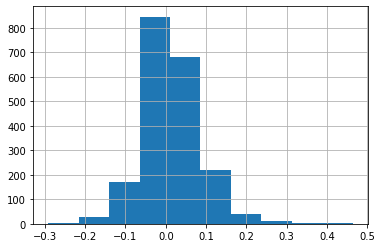

In [ ]:
df_cut_other_dum.start_roc.hist()

In [ ]:
import statsmodels.formula.api as smf

# Fit a mixed-effects model
model = smf.mixedlm("glc_change ~ IOB+start_roc+start_glc +cv", #+time_since_last_ins_dose
                        df_cut_other_dum, 
                        groups=df_cut_other_dum["ID"])
result = model.fit()

print(result.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: glc_change
No. Observations: 2009    Method:             REML      
No. Groups:       568     Scale:              5.7709    
Min. group size:  1       Log-Likelihood:     -4766.6778
Max. group size:  20      Converged:          Yes       
Mean group size:  3.5                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.532    0.364  4.214 0.000  0.820  2.245
IOB           -0.113    0.020 -5.594 0.000 -0.152 -0.073
start_roc     14.521    0.951 15.270 0.000 12.657 16.385
start_glc     -0.251    0.028 -9.093 0.000 -0.305 -0.197
cv            -0.070    0.009 -7.583 0.000 -0.088 -0.052
Group Var      1.263    0.092                           



In [ ]:
import statsmodels.formula.api as smf

# Fit a mixed-effects model
model = smf.mixedlm("glc_change ~ start_glc", df_cut_other, groups=df_cut_other["ID"])
result = model.fit()

print(result.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: glc_change
No. Observations: 2009    Method:             REML      
No. Groups:       568     Scale:              6.6513    
Min. group size:  1       Log-Likelihood:     -4889.4757
Max. group size:  20      Converged:          Yes       
Mean group size:  3.5                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      0.414    0.362  1.144 0.253 -0.295  1.124
start_glc     -0.225    0.029 -7.899 0.000 -0.281 -0.169
Group Var      1.257    0.093                           

